Price a call option using Binomial tree. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

In [ ]:
class OptionType(str, Enum):
    CALL = "call"
    PUT = "put"
    
class ExerciseStyle(str, Enum):
    AMERICAN = "american"
    EURPOEAN = "european"

In [152]:
class BinomialOption:
    def __init__(self, stock_price, volatality, interest_rate, strike, time_steps):
        self.stock_price = stock_price
        self.volatality = volatality
        self.interest_rate = interest_rate
        self.strike = strike
        self.time_steps = time_steps
        self.u = 1 + volatality * np.sqrt(1 / time_steps)
        self.v = 1 - volatality * np.sqrt(1 / time_steps)
        self.p = 0.5 + ((interest_rate * np.sqrt(1 / time_steps)) / (2 * volatality))
        self.price_matrix = np.zeros((self.time_steps + 1, self.time_steps + 1))
        self.payoff_matrix = np.zeros((self.time_steps + 1, self.time_steps + 1))
        self.payoff_matrix = np.zeros((self.time_steps + 1, self.time_steps + 1))

    def calculate(self):
        self.price_matrix[0, 0] = self.stock_price
        for j in range(self.time_steps + 1):
            for i in range(j + 1):
                self.price_matrix[i, j] = np.round(
                    self.stock_price * np.power(self.v, i) * np.power(self.u, j - i), 0
                )
                self.payoff_matrix[i, j] = np.maximum(
                    self.price_matrix[i, j] - self.strike, 0
                )

        
        self.value_matrix = np.zeros((self.time_steps + 1, self.time_steps + 1))
        dt = 1 / self.time_steps
        discount_factor = 1 / (1 + self.interest_rate * dt)
        for j in range(self.time_steps, -1, -1):
            for i in range(j + 1):
                if j == self.time_steps:
                    self.value_matrix[i, j] = self.payoff_matrix[i, j]
                else:
                    self.value_matrix[i, j] = discount_factor * (
                    self.p * self.value_matrix[i, j + 1] + (1 - self.p) * self.value_matrix[i + 1, j + 1]
            )
     

In [ ]:
class Plotter():

    def plot(self, stock_price, time_steps, price_matrix, value_matrix, payoff_matrix):
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.set_title(f"Binomial tree \n\n Stock Price {stock_price}")

        for row_idx in range(time_steps + 1):
            for col_idx in range(row_idx + 1):
                x = row_idx
                y = (row_idx - 2*col_idx)/2
                
                text = f"Spot:  {price_matrix[col_idx, row_idx]}\nOption: {np.around(value_matrix[col_idx, row_idx], 2)}\nPayoff: {payoff_matrix[col_idx, row_idx]}"
                ax.text(x, y, text, ha='center', va='center',
                        bbox=dict(facecolor='white', alpha=0.8))
                
                if row_idx < time_steps:
                    ax.plot([x, x+1], [y, y+0.5], 'k-', lw=0.5)  # Up movement
                    ax.plot([x, x+1], [y, y-0.5], 'k-', lw=0.5)  # Down 
                        
        ax.set_xlim(-0.5, time_steps + 0.5)
        ax.set_ylim(-time_steps/2 - 0.5, time_steps/2 + 0.5)
        ax.axis("off")
        plt.show()


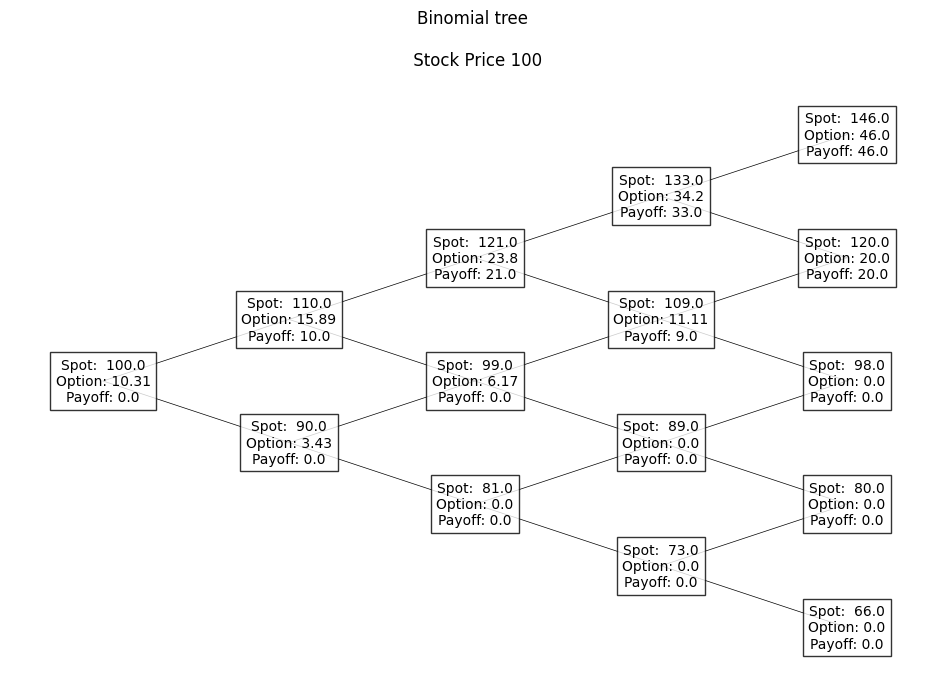

In [153]:
stock_price = 100
volatality = 0.2
interest_rate = 0.05
strike = 100
time_steps = 4

option_price = BinomialOption(
    stock_price, 
    volatality,
    interest_rate,
    strike,
    time_steps)

def print_matrix(matrix, steps):
    for row_idx in range(steps):
        for col_idx in range(steps):
            print(f"{col_idx}, {row_idx} -> {matrix[col_idx, row_idx]}")

option_price.calculate()
plotter = Plotter()
plotter.plot(stock_price, time_steps, option_price.price_matrix, option_price.value_matrix, option_price.payoff_matrix)
